# Multilayer Percceptron on XOR

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def sigmoid_der(x):
    return x*(1.0 - x)
def cost(error):
    return math.pow(error, 2)/2.0

### Multilayer Perceptron (Neural Network)

In [8]:
class Nural_Network:
    def __init__(self, inputs):
        self.inputs = inputs

        self.w_i=np.random.random((2, 3))
        self.w_h=np.random.random((3, 1))
        
        print(self.w_i.shape)
        print(self.w_h.shape)

    def cal(self, inp):
        s1=sigmoid(np.dot(inp, self.w_i))
        s2=sigmoid(np.dot(s1, self.w_h))
        return s2

    def train(self, inputs,outputs, it, lr):
        losses = np.array([])
        for i in range(it):
            loss=0
            for j in range(len(inputs)):
                l0=inputs[j].reshape(1,-1)
                l1=sigmoid(np.dot(l0, self.w_i))
                l2=sigmoid(np.dot(l1, self.w_h))

                l2_err=outputs[j].reshape(1,-1) - l2
                loss+=cost(l2_err)
                l2_delta = np.multiply(l2_err, sigmoid_der(l2))

                l1_err=np.dot(l2_delta, self.w_h.T)
                l1_delta=np.multiply(l1_err, sigmoid_der(l1))

                self.w_h+=lr*np.dot(l1.T, l2_delta)
                self.w_i+=lr*np.dot(l0.T, l1_delta)
            losses = np.append(losses, loss)
        return losses

### Input and Target data

In [19]:
inputs=np.array([[0,0], [0,1], [1,0], [1,1]])
outputs=np.array([ [0], [1],[1],[0] ])
n=Nural_Network(inputs)

(2, 3)
(3, 1)


In [18]:
epochs = 10000
losses = n.train(inputs, outputs, epochs, lr=0.2)

### Plot loss vs epochs

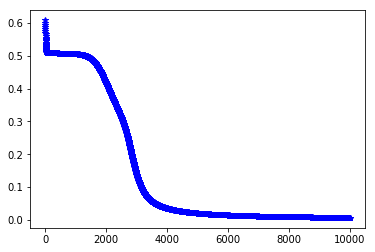

In [17]:
plt.plot(np.arange(1,epochs+1), losses, 'b*')

### Final prediction for inputs

In [16]:
output = n.cal(inputs)
print(output)

[[0.07979048]
 [0.94894779]
 [0.94893016]
 [0.02663338]]
